In [110]:
import pandas as pd
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
data = pd.read_csv("mem_usage.csv")

In [65]:
time = data["Time (seconds)"]
load = data["Load (samples/sec)"]
mach_mem = data["Mach mem usage"]
kafka_mem = data["Kafka mem usage"]

In [66]:
# convert mem usage to megabytes

def bytes_to_megabytes(lst):
    for i in range(0, len(lst)):
        lst.at[i] = lst[i] / 1_000_000

bytes_to_megabytes(mach_mem)
bytes_to_megabytes(kafka_mem)

In [67]:
data

,Time (seconds),Load (samples/sec),Mach mem usage,Kafka mem usage
0,0,200000,0.000000,0.716584
1,1,200000,0.000000,9.115528
2,2,200000,0.000000,5.016692
3,3,200000,1.000160,5.016692
4,4,200000,0.000000,4.508081
...,...,...,...,...
1534,1534,200000,0.000000,NaN
1535,1535,200000,17.225167,NaN
1536,1536,200000,0.000000,NaN
1537,1537,200000,0.000000,NaN


In [102]:
max_mem_usage = max(max(mach_mem), max(kafka_mem))

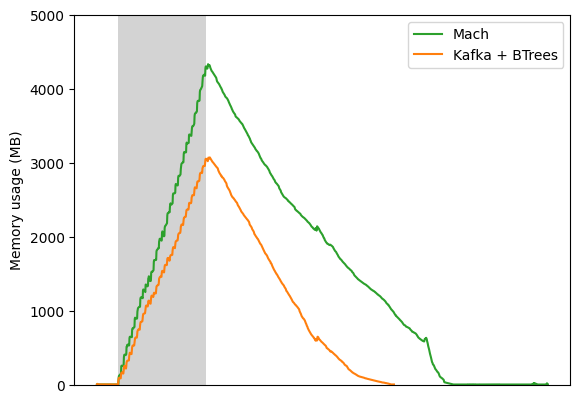

5000


In [111]:
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_ylabel("Memory usage (MB)")

spike_begin = load.loc[load.eq(max(load))].index[0]
spike_end = load[spike_begin:].loc[load.eq(min(load))].index[0] - 1

plot_ylim = math.ceil(max_mem_usage / 1000) * 1000

ax.plot(time, mach_mem, label="Mach", color="tab:green")
ax.plot(time, kafka_mem, label="Kafka + BTrees", color="tab:orange")
ax.axvspan(spike_begin, spike_end, facecolor="lightgrey")

plt.ylim([0, 5000])
plt.legend()
plt.show()
print(plot_ylim)